Did this lab to test a larger test sample 0f .3 instead of .2, everything else is same
Space X Falcon 9 First Stage Landing Prediction
Hands on Lab: Complete the Machine Learning Prediction lab
Estimated time needed: 60 minutes

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each,
much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.

No need to import libraries, using local jupyter notebook started from Anaconda

In [1]:
#Copied from course
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Copied from course
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
import requests # This is different then the lab as it running local
import io

# Load dataset
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
data = pd.read_csv(io.StringIO(response1.text))
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.StringIO(response2.text))
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
#Create Numpy array from class column
Y = data['Class'].to_numpy()

In [7]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2) # Changed sample size

In [9]:
Y_test.shape # We can see we have larger sample

(27,)

In [10]:
#Define parameters
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
#Create logistic regression object
lr=LogisticRegression()
# Create GridSearchCV object with cv=10
logreg_cv = GridSearchCV(lr, parameters, cv=10)
# Fit to find best parameters
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [11]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8595238095238095


Test set accuracy: 0.8148148148148148


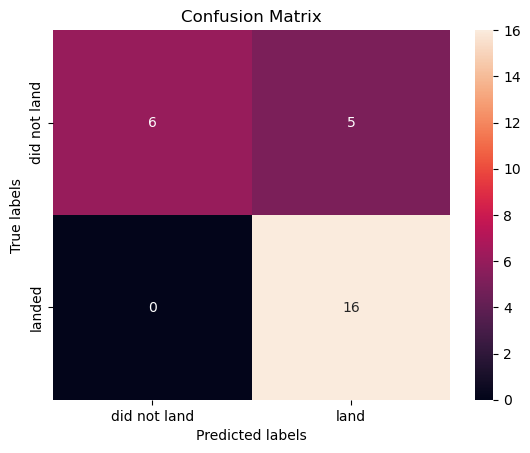

In [12]:
#Splightly better then lab
# Calculate accuracy on test data
accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", accuracy)
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [13]:
# Fixed parameters, rbf listed twice
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
#Create SVM object
svm = SVC()
# Create Gridsearchcv object with cv=10
svm_cv = GridSearchCV(svm, parameters, cv=10)
# Fit the object to find the best parameters
svm_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(0.03162277660168379), 'gamma': np.float64(0.001), 'kernel': 'linear'}
accuracy : 0.8595238095238095


SVM test set accuracy: 0.7777777777777778


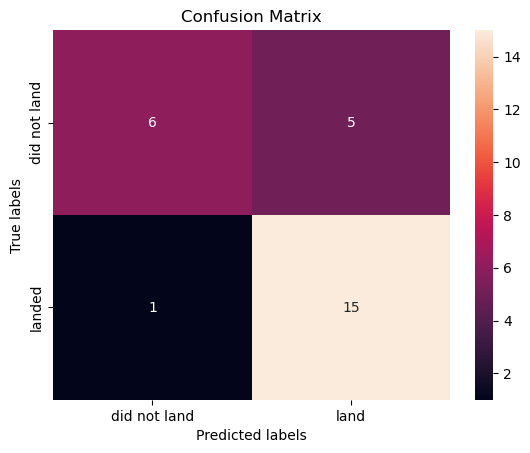

In [14]:
# Calculate accuracy on test data
svm_accuracy = svm_cv.score(X_test, Y_test)
print("SVM test set accuracy:", svm_accuracy)
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8880952380952382
Decision Tree test set accuracy: 0.8148148148148148


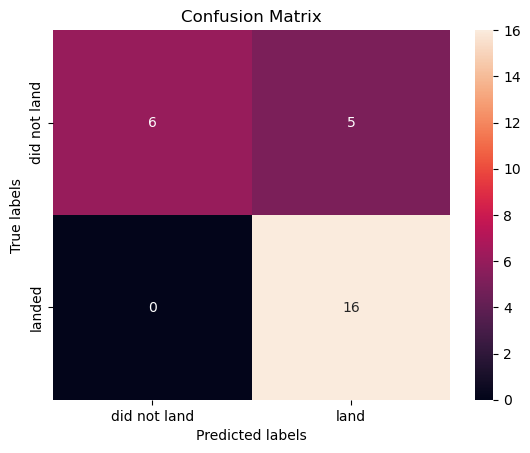

In [15]:
#Fixed parameters, got an error with the max_features having "auto"
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
# Create decision tree classifier object
tree = DecisionTreeClassifier()
# Create Gridsearchcv object with cv=10
tree_cv = GridSearchCV(tree, parameters, cv=10)
# Fit the object to find the best parameters
tree_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
# Calculate test accuracy for decision tree
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree test set accuracy:", tree_test_accuracy)
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
accuracy : 0.8738095238095239
KNN test set accuracy: 0.8148148148148148


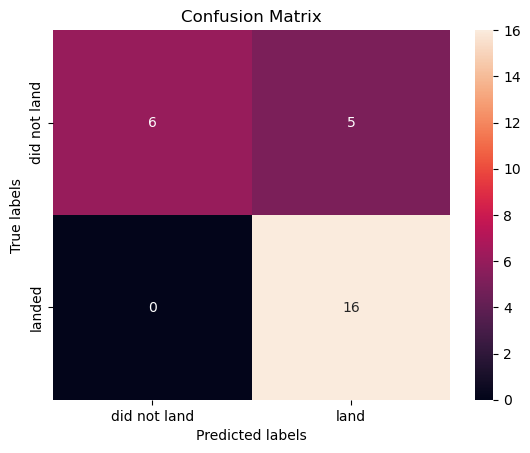

In [18]:
#Parameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
# Create k nearest neighbors object
KNN = KNeighborsClassifier()
# Create Gridsearchcv object with cv=10
knn_cv = GridSearchCV(KNN, parameters, cv=10)
# Fit the object to find the best parameters
knn_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
# Calculate the accuracy of knn_cv on the test data using the method score
knn_test_accuracy = knn_cv.score(X_test, Y_test)
print("KNN test set accuracy:", knn_test_accuracy)
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [19]:
# Print all scores
print("Model                 CV Score    Test Score")
print("--------------------------------------------")
print(f"Logistic Regression   {logreg_cv.best_score_:.4f}       {logreg_cv.score(X_test, Y_test):.4f}")
print(f"SVM                   {svm_cv.best_score_:.4f}       {svm_cv.score(X_test, Y_test):.4f}")
print(f"Decision Tree         {tree_cv.best_score_:.4f}       {tree_cv.score(X_test, Y_test):.4f}")
print(f"KNN                   {knn_cv.best_score_:.4f}       {knn_cv.score(X_test, Y_test):.4f}")

Model                 CV Score    Test Score
--------------------------------------------
Logistic Regression   0.8595       0.8148
SVM                   0.8595       0.7778
Decision Tree         0.8762       0.7778
KNN                   0.8738       0.8148
